In [244]:
#Importem pandas i numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [245]:
dataset_name= 'thyroidDF'
df = pd.read_csv(f'data/{dataset_name}.csv')

In [246]:
print(df.dtypes)
df.head()

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
dtype: object


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [247]:
boolean_columns = df.columns[df.isin(['t', 'f']).all()]
df[boolean_columns] = df[boolean_columns].applymap(lambda x: 1 if x == 't' else 0)

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,0,0,0,0,0,0,0,1,...,NaN,0,NaN,0,NaN,0,NaN,other,-,840801013
1,29,F,0,0,0,0,0,0,0,0,...,128.0,0,NaN,0,NaN,0,NaN,other,-,840801014
2,41,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,11.0,other,-,840801042
3,36,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,26.0,other,-,840803046
4,32,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,1,36.0,other,S,840803047


In [248]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [249]:
hyperthyroid = {'A', 'B', 'C', 'D'}
hypothyroid = {'E', 'F', 'G', 'H'}

def classify_diagnosis(diagnosis):
    
    letters = set(diagnosis.replace('|', ''))
    if letters & hyperthyroid:
        return 'Hyperthyroid'
    
    if letters & hypothyroid:
        return 'Hypothyroid'
    
    return 'Negative'

df['target'] = df['target'].apply(classify_diagnosis)
df['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [250]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

sex    0.033471
TSH    0.091801
T3     0.283908
TT4    0.048190
T4U    0.088203
FTI    0.087440
TBG    0.961949
dtype: float64

In [251]:
df['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [252]:
dummies_referral_source = pd.get_dummies(df['referral_source'], dtype='int',drop_first=False)
df = pd.concat([df, dummies_referral_source], axis=1)
df = df.drop(['referral_source','other'], axis="columns")

In [253]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI,TBG_measured,TBG,target,patient_id,STMW,SVHC,SVHD,SVI,WEST
0,29,F,0,0,0,0,0,0,0,1,...,NaN,0,NaN,Negative,840801013,0,0,0,0,0
1,29,F,0,0,0,0,0,0,0,0,...,NaN,0,NaN,Negative,840801014,0,0,0,0,0
2,41,F,0,0,0,0,0,0,0,0,...,NaN,1,11.0,Negative,840801042,0,0,0,0,0
3,36,F,0,0,0,0,0,0,0,0,...,NaN,1,26.0,Negative,840803046,0,0,0,0,0
4,32,F,0,0,0,0,0,0,0,0,...,NaN,1,36.0,Negative,840803047,0,0,0,0,0


In [254]:
df['age'].nsmallest(5)

456     1
1142    1
1267    1
1921    1
3300    1
Name: age, dtype: int64

In [255]:
df['age'].nlargest(5)

8105    65526
6392    65512
5710    65511
2976      455
790        97
Name: age, dtype: int64

In [256]:
df = df[df['age'] < 100]

In [257]:
# Omplir NaNs de 'sexe' amb 'F' si 'pregnant' és 1
df.loc[(df['sex'].isna()) & (df['pregnant'] == 1), 'sex'] = 'F'

In [258]:
dummies_sex = pd.get_dummies(df['sex'], dtype='int',drop_first=True)
df = pd.concat([df, dummies_sex], axis=1)
df = df.drop(['sex'], axis="columns")
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TBG_measured,TBG,target,patient_id,STMW,SVHC,SVHD,SVI,WEST,M
0,29,0,0,0,0,0,0,0,1,0,...,0,NaN,Negative,840801013,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,0,NaN,Negative,840801014,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,1,11.0,Negative,840801042,0,0,0,0,0,0
3,36,0,0,0,0,0,0,0,0,0,...,1,26.0,Negative,840803046,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,1,36.0,Negative,840803047,0,0,0,0,0,0


In [259]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

TSH    0.091841
T3     0.283922
TT4    0.048211
T4U    0.088242
FTI    0.087478
TBG    0.961933
dtype: float64

In [260]:
mesures = ['TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
valors = ['TSH', 'T3','TT4','T4U','FTI', 'TBG']
for i in range(len(mesures)):
    no_mesured = df[df[mesures[i]] == 0]
    is_theory_correct = no_mesured[valors[i]].isna().all()
    print(is_theory_correct)


True
True
True
True
True
True


In [261]:
df.drop(['patient_id','TBG']+mesures,axis='columns', inplace=True)
for i in range(len(valors[:-1])):
    print(df[valors[i]].min(), df[valors[i]].max())

0.005 530.0
0.05 18.0
2.0 600.0
0.17 2.33
1.4 881.0


In [262]:
df_fill_na = df
df_fill_na[valors[:-1]] = df_fill_na[valors[:-1]].fillna(-1)
df_fill_na.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,TT4,T4U,FTI,target,STMW,SVHC,SVHD,SVI,WEST,M
0,29,0,0,0,0,0,0,0,1,0,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,128.0,-1.0,-1.0,Negative,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,0,0
3,36,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,Negative,0,0,0,0,0,0


In [263]:
df_fill_na.dropna(inplace=True)

In [264]:
print(df_fill_na['target'].value_counts())

target
Negative        8260
Hypothyroid      667
Hyperthyroid     241
Name: count, dtype: int64


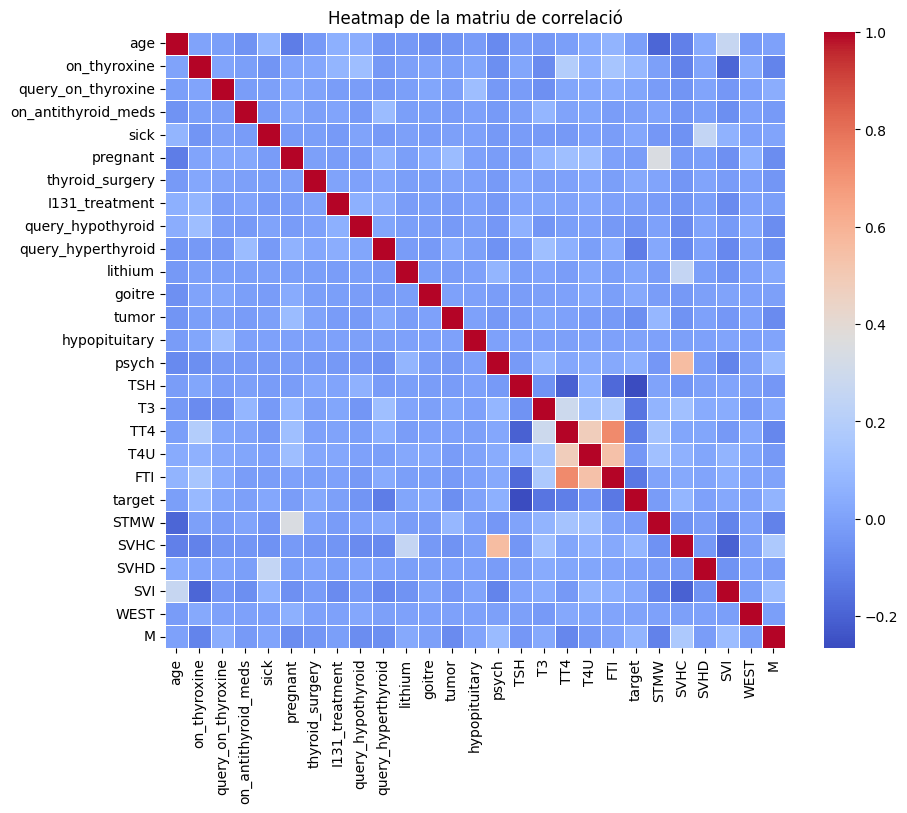

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df_cleared = df_fill_na.copy()
numeric_features = df_cleared.select_dtypes(np.number).keys()
non_numeric = [k for k in df_cleared.keys() if k not in numeric_features]
df_cleared.loc[:, non_numeric] = df_cleared.loc[:, non_numeric].apply(LabelEncoder().fit_transform)

# Calcular la matriu de correlació i mostrar un heatmap sense anotacions
correlation_matrix = df_cleared.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

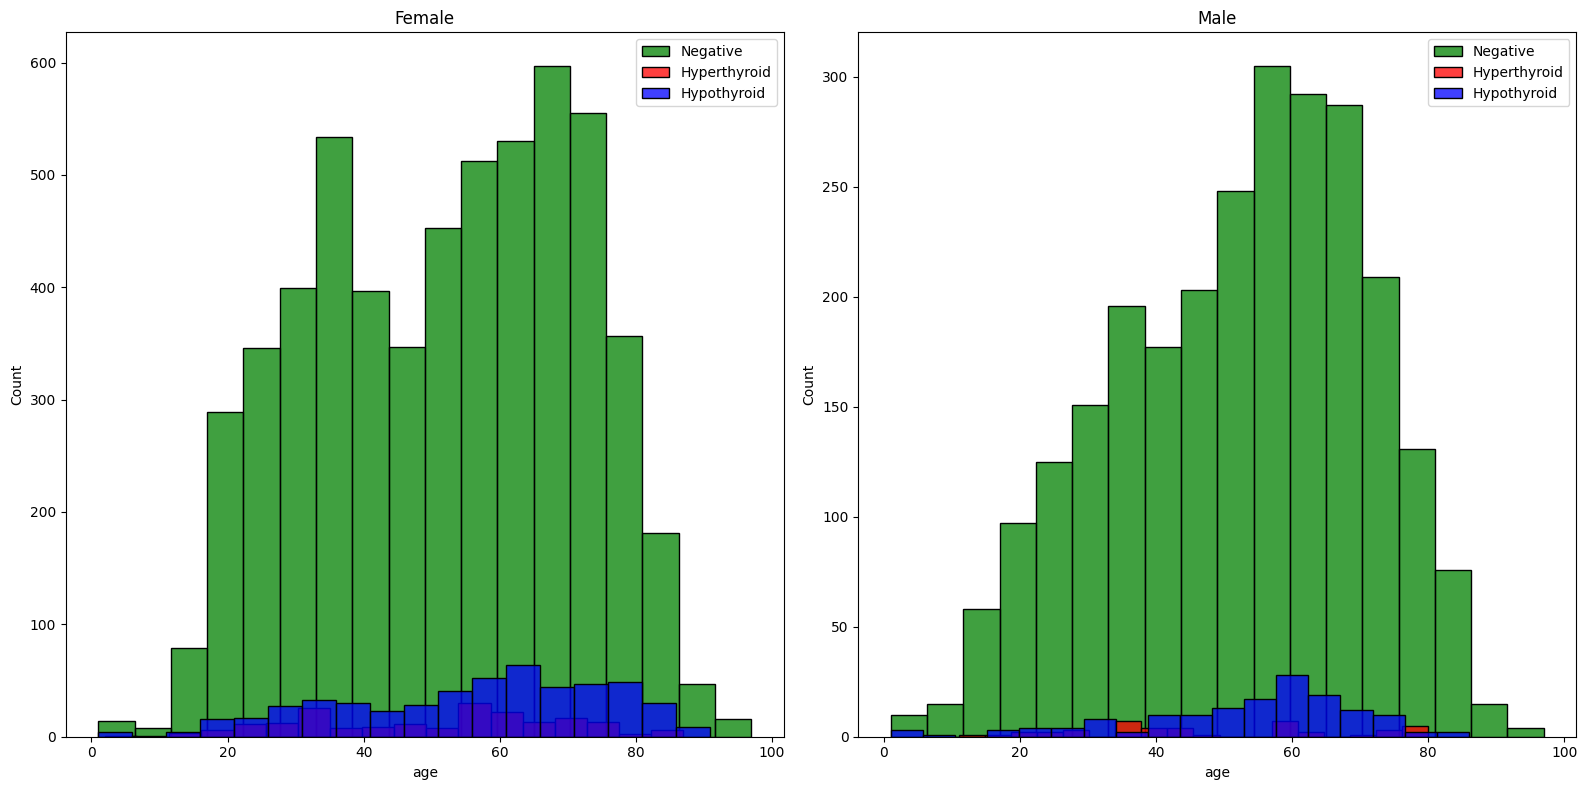

In [266]:
# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Filtrar dades per sexe
women = df_fill_na[df_fill_na['M'] == 0]
men = df_fill_na[df_fill_na['M'] == 1]

# Colors i targets
targets = ['Negative', 'Hyperthyroid', 'Hypothyroid']
colors = ['green', 'red', 'blue']

# Subplot per a dones
for target, color in zip(targets, colors):
    sns.histplot(
        data=women[women['target'] == target],
        x="age",
        bins=18,
        label=target,
        ax=axes[0],
        color=color,
        kde=False
    )
axes[0].legend()
axes[0].set_title('Female')

# Subplot per a homes
for target, color in zip(targets, colors):
    sns.histplot(
        data=men[men['target'] == target],
        x="age",
        bins=18,
        label=target,
        ax=axes[1],
        color=color,
        kde=False
    )
axes[1].legend()
axes[1].set_title('Male')

# Mostrar la gràfica
plt.tight_layout()
plt.show()


In [267]:
from sklearn.model_selection import train_test_split
target_att = 'target'
attributes = [k for k in df.keys() if k!= target_att]
X = df_fill_na[attributes]
y = df_fill_na[[target_att]]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

print(f1_score(y_val,y_pred,average='macro'))
print(accuracy_score(y_val,y_pred))
print("Matriu de confusió:\n", cm)




0.7504102119772376
0.9434219495569189
Matriu de confusió:
 [[  16    0   17]
 [   0   63   56]
 [   3    7 1305]]


In [271]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score

# Configuració de classificadors
random_state = 20
base_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'SVC': SVC(kernel='linear', random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

PRC = 0.1
acc_r=np.zeros((10,6,2))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=PRC,random_state=random_state*(i+1))
    for j, model in enumerate(base_classifiers.values()):
        ovo = OneVsOneClassifier(model)
        ovr = OneVsRestClassifier(model)
        ovo.fit(X_train,y_train)
        ovr.fit(X_train,y_train)
        yhat_ovo=ovo.predict(X_test)
        yhat_ovr=ovr.predict(X_test)
        acc_r[i][j][0] = f1_score(y_test, yhat_ovo,average='macro')
        acc_r[i][j][1] = f1_score(y_test, yhat_ovr, average='macro')
        print(acc_r[i][j][0],acc_r[i][j][1])




0.6781851383621295 0.6591002724889033
0.9100930915267514 0.9148213478664892
0.926678541111824 0.926678541111824
0.9180720245937636 0.9180720245937636
0.7329480396147062 0.608939170794841
0.627929520442493 0.627929520442493
0.6861675184966883 0.6624106690675821
0.9274026343799385 0.9190788111662264
0.9425589062261389 0.9335557656005538
0.9647305607336462 0.9508937027276039
0.6985868091560552 0.6427158582731338
0.6761565122468521 0.6761565122468521
0.7682532589812919 0.707686319493814
0.8860783800296761 0.8782001412320071
0.9163424468261793 0.9124348757922199
0.9269132354238737 0.9363902911242622
0.7632618525429814 0.6728711816817544
0.6517210431844579 0.6517210431844579
0.7891583747927031 0.7472221133623336
0.9665218163153467 0.9577785042315935
0.9336160670761431 0.9192455586346157
0.9145905777084483 0.8996909687378206
0.8057632630599828 0.7049363751003095
0.7231182795698925 0.7231182795698925
0.7113097498801388 0.6575157260275146
0.8771729841585976 0.8735802469135803
0.9055871283154239

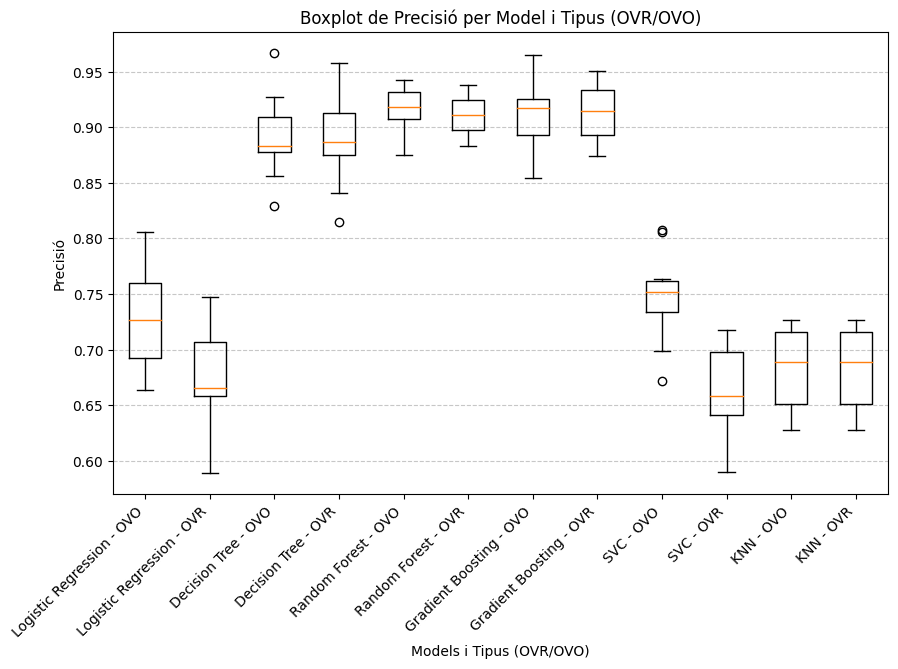

In [276]:
boxplot_data = []
for j in range(acc_r.shape[1]):  # Recórrer els models
    for k in range(acc_r.shape[2]):  # Recórrer els tipus (OVR/OVO)
        # Reorganitzar les dades per cada combinació (model, tipus)
        data = acc_r[:, j, k].reshape(-1)  # Combina totes les iteracions i observacions
        boxplot_data.append(data)

# Crear el boxplot
plt.figure(figsize=(10, 6))
labels = [
    f'{model} - {"OVR" if k == 1 else "OVO"}'
    for j, model in enumerate(base_classifiers.keys())
    for k in range(2)  # OVR (1) i OVO (0)
]
plt.boxplot(boxplot_data, labels=labels)
plt.title('Boxplot de Precisió per Model i Tipus (OVR/OVO)')
plt.xlabel('Models i Tipus (OVR/OVO)')
plt.ylabel('Precisió')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()